In [1]:
import torch
import torch.optim as optim
import torchvision.models as models
import math

# for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Model

In [2]:
model = models.vgg11_bn(pretrained=True) 

# Optimizer

In [3]:
#optimizer = optim.SGD(model.parameters(),
#                    lr=0.01,
#                    momentum=0.9,
#                    weight_decay=0,
#                    nesterov=True)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Cosine Annealing

In [4]:
def cosine_annealing(optimizer, start_lr, cur_steps, num_cycle):
    t_cur = cur_steps % num_cycle
    lr = 0.5 * start_lr * (math.cos(math.pi * t_cur / num_cycle) + 1)
    for param_group in optimizer.param_groups:
        param_group["lr"] = lr
    return lr

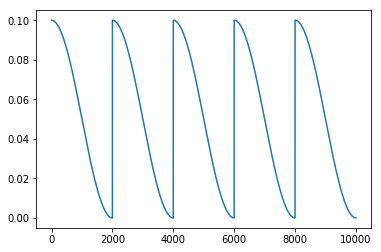

In [5]:
max_epochs = 10000
start_lr = 0.1
num_cycle = 2000
lr = []
for e in range(max_epochs):
    lr.append(cosine_annealing(optimizer, start_lr, e, num_cycle))
plt.plot(range(max_epochs), lr)